# Create Intermediate Raster Result

In [1]:
from datetime import datetime

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          18fec623-6600-41af-b82b-24ccf47cb9f9

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

## Query raster via WMS

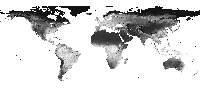

In [5]:

def plot_geoengine_img(colorizer: str):
    time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    colorizer_min_max=(0, 255)
)

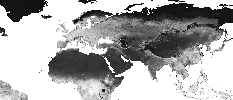

In [6]:
workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    colorizer_min_max=(0, 255)
)

## Store part of the world as new dataset

In [7]:
stored_dataset = workflow.save_as_dataset(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    "Part NDVI",
    "Test Description",
)
stored_dataset

StoredDataset(dataset_id=b009b924-eb41-42a2-8579-a659af50eda3, upload_id=d0b9a9c3-3cab-4961-8317-a8af53170238)

In [17]:
new_workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": str(stored_dataset.dataset_id)
                        }
                    }
                }
            })
new_workflow

83cd031d-ceb1-536d-99a2-4c0a99888ae3

## WMS request from new dataset

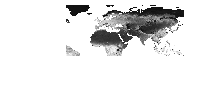

In [18]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    colorizer_min_max=(0, 255)
)

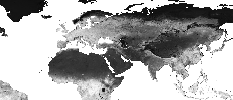

In [19]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    colorizer_min_max=(0, 255)
)